### Delta Lake 01

I examinate how to load data in and out from my local machine to delta lake. As far as I understand, delta lake is built on top of spark. It is more like a special format or special class for me. Most importantly, it provides ACID. I ran all the codes on windows power shell as I set up the environment there. This notebook is in the anaconda environment. I tried to run the same codes here so that we can see output as well. However, the configuration took me a while and it still failed so I used the markdown format.

### Run PySpark with the Delta Lake package and additional configurations:

`
pyspark --packages io.delta:delta-core_2.12:1.0.0 –conf "spark.sql.extensions=io.delta.sql.DeltaSparkSessionExtension" –conf "spark.sql.catalog.spark_catalog=org.apache.spark.sql.delta.catalog.DeltaCatalog"
`

### Then I load the data into spark:

`
data = spark.read.load(“path to the local file”)
pq=data.write.format(“delta”).save(“/tmp/pq-table”) 
df = spark.read.format(“delta”).load(“/tmp/pq-table”)
`

The /tmp is a directory to save temporary files. pq-table is a delta object. Names have to be unique. For this particular file, one of the columns has a space in its name. The space or other special characters will stop the table becoming a delta table. Therefore, I dropped the column just because of convenience. I tried .withColumnRenamed() but it didn’t work. I should try alias, but I am still learning that. 

### Partition and write the dataset:

`
df.write \
.format(“delta”) \ 
.partitionBy(“Date”) \
.saveAsTable(“stock”)
`

The codes above would write the dataset from spark to local machine at the current directory. PartitionBy would create different sub-directories under the current directory. However, each unique value is one directory. I extracted year and month out and put them into PartitionBy, but they don’t work. If we want nested directories like below (example). We might have to create the year and month columns, but I know that it would be redundant and that’s not what we want. I would keep looking for solutions for this. 

We can also use bucketing, but a buckets number has to be assigned in that function, so I think it is not ideal.

Example:

`
Root
|-------year1
|---------Month1
|-----------day1
`

### Output of the write:

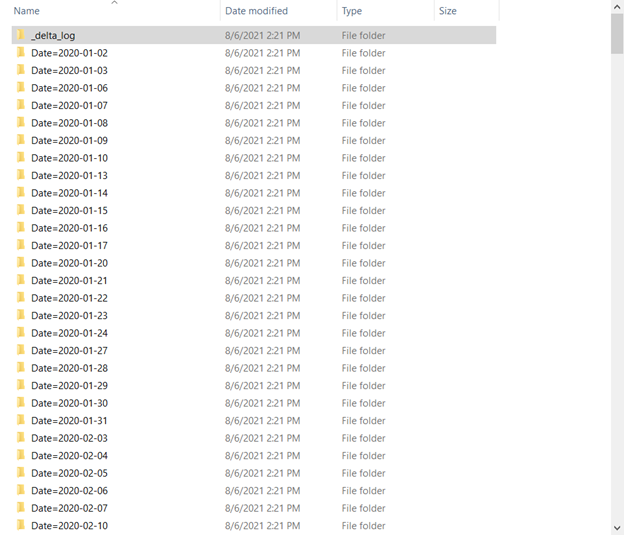

### Next Step:

- Keep looking for solutions to address how to write the dataset out into nested folders based on column
- Learn how to move data from cloud platform/database connections/API to spark and then partition out to cloud platform. Like S3 -> Spark -> S3
- How to apply python profiling to the delta table


### Questions:

- Relationship between Spark and Delta Lake. Like how does the parquet file move to spark then move to Delta Lake? Or is it simply changing the spark dataframe into delta format? Like change it to a different class in python. I understand that Delta Lake would provide ACID which spark does not have. It makes sense if ACID is critical to our goal. However, if we use Delta Lake just because of partitioning. I think the original spark already has the partitioning function. 
- Need to figure out all these different paths. Some are cloud path and some are local paths. How to access these directories and manage the files in those directory. 